In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2


from sklearn.datasets import make_blobs


import warnings
warnings.filterwarnings("ignore")

In [2]:
def euclid_distance(X, xi):
    a = -2 * np.dot(X, xi.T)
    b = np.sum(xi**2, axis=1)
    c = np.sum(X**2, axis=1)[:, np.newaxis]
    return a + b + c

In [3]:
def neighbourhood_points(X, centroid, distance=5):
    distances = euclid_distance(X, centroid)
    return distances <= distance

In [4]:
def gaussian_kernel(distances, bandwidth):
    return (1/(bandwidth*np.sqrt(2*np.pi))) * np.exp(-0.5*((distances / bandwidth))**2)

In [5]:
def mean_shift_segmentation(X, bandwidth=5, iter=15):
    O = np.copy(X)
    for it in range(iter):
        for i, x in enumerate(O):
            x = x[np.newaxis,:]
            filter = neighbourhood_points(X, x, bandwidth)
            neighbours = X[np.squeeze(filter)]
            distances = euclid_distance(neighbours, x)
            weight = gaussian_kernel(distances, bandwidth)
            new = np.dot(neighbours.T, weight) / np.sum(weight)
            
            O[i] = new.reshape(-1)
    return O

In [6]:
X, _ = make_blobs(n_samples=100, n_features=2, shuffle=True, cluster_std=1.7)

In [7]:
res = mean_shift_segmentation(X, bandwidth=6, iter=150)

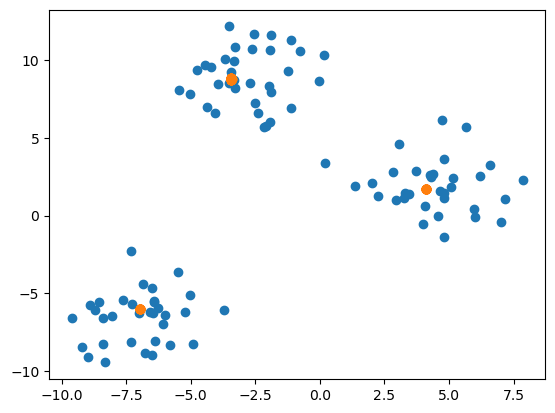

In [8]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(res[:,0], res[:,1])

In [9]:
image = cv2.imread('../datasets/land.png')

In [10]:
sp = [10,30,60,90]
sr = [30,50,100,150]
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )
images = []
for p in sp:
    for r in sr:
        luv = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)
        res = cv2.pyrMeanShiftFiltering(luv, p, r)
        rgb = cv2.cvtColor(res, cv2.COLOR_LUV2RGB)
        images.append(rgb)

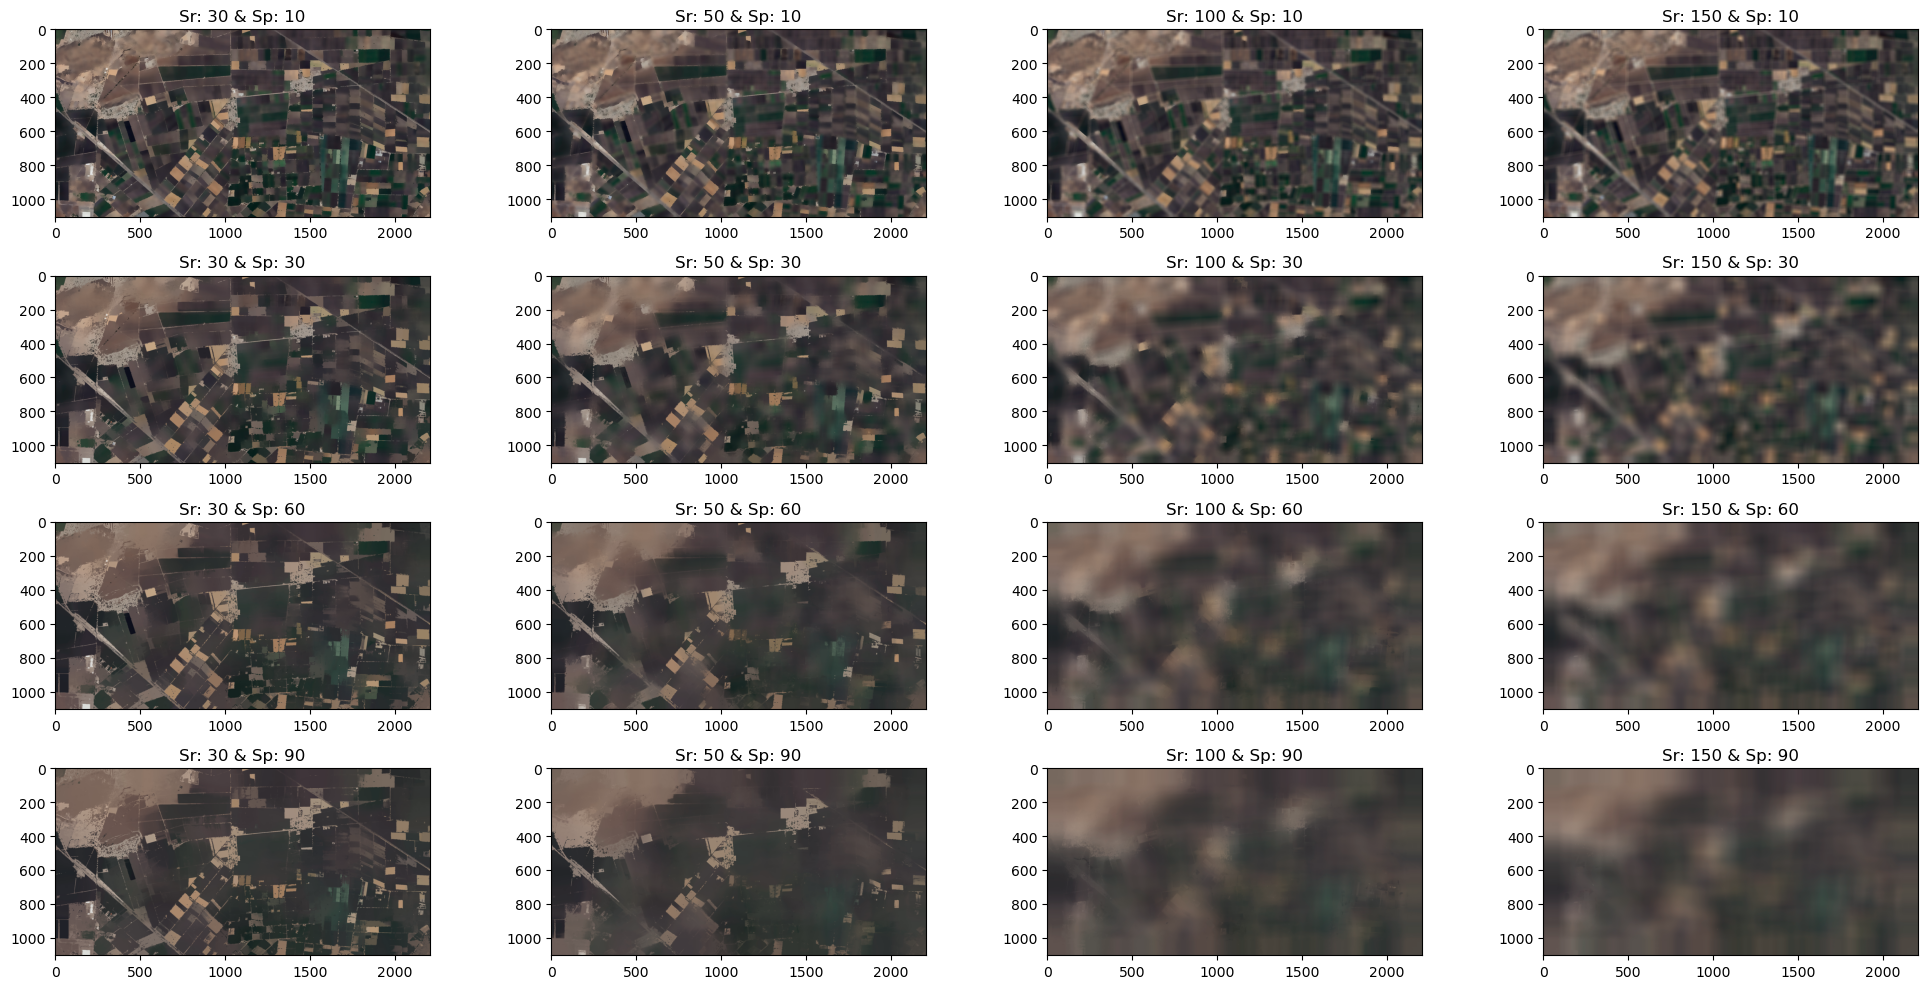

In [29]:
import math

plots = math.ceil(math.sqrt(len(images)))

fig, axes = plt.subplots(plots,plots, figsize=(20,10))

for i in range(0,4):
    for j in range(0,4):
        img = images[i * 4 + j]
        axes[i,j].imshow(img)
        axes[i,j].set_title(f"Sr: {sr[j]} & Sp: {sp[i]}")
        
fig.tight_layout()

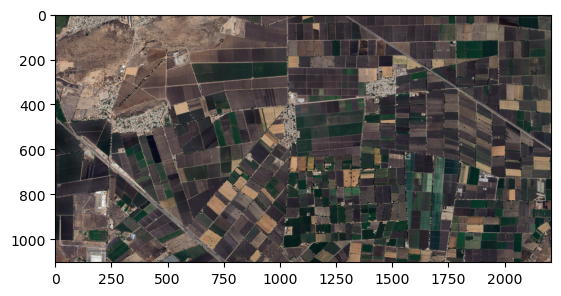

In [30]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGBA))